#### The Assignment
This notebook was utilized as a part of my classwork in the Masters of Business Analytics Program at Seattle University. While this notebook wasn't directly submitted, it provided support evidence for answers on an academic assignment.

In this project, I developed a model to predict if a candidate who after accepting a job offer, will end up not accepting the role. A range of features of candidates were looked at to make this assessment.

#### Dataset
This dataset was part of the recruitment process of a particular client of ScaleneWorks. You can access this data set at the following <a href='https://www.kaggle.com/datasets/avikumart/hrdatasetclassif'>link.</a> Descriptions of each feature are included at the link as well.

---

# Exploring the Data
Our project begins wtih importing the necessary libraries, reading the dataset, and verifying the dataset was importing correctly.

The last column of our dataset 'Status' is our target variable. For 'Status', candidates fall into one of two categories either 'Joined' or 'Not Joined'.

In [71]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Loading the Dataset
df = pd.read_excel('DataSet_HR Analytics at Scalene Works.xlsx', sheet_name='Data')

# Displaying A Few Record
df.head()

# data.info()

c:\ProgramData\Anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning:

Unknown extension is not supported and will be removed



,Candidate Ref,DOJ Extended,Duration to accept offer,Notice period,Offered band,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Joining Bonus,Candidate relocate actual,Gender,Candidate Source,Rex in Yrs,LOB,Location,Age,Status
0,2110407,Yes,14.0,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34,Joined
1,2112635,No,18.0,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34,Joined
2,2112838,No,3.0,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,27,Joined
3,2115021,No,26.0,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34,Joined
4,2115125,Yes,1.0,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,34,Joined


### Addressing Missing Values

In [72]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'Misssing Values (Percent)': percent_missing})

missing_value_df = missing_value_df.sort_values('Misssing Values (Percent)', ascending=False).head(20) # Remove head to show more (if needed)
missing_value_df

,column_name,Misssing Values (Percent)
Duration to accept offer,Duration to accept offer,22.046542
Percent difference CTC,Percent difference CTC,6.900186
Pecent hike expected in CTC,Pecent hike expected in CTC,6.056920
Percent hike offered in CTC,Percent hike offered in CTC,4.832563
Candidate Ref,Candidate Ref,0.000000
Candidate Source,Candidate Source,0.000000
Age,Age,0.000000
Location,Location,0.000000
LOB,LOB,0.000000
Rex in Yrs,Rex in Yrs,0.000000


There was an attempt to impute missing values for the following three percentages:
- Percent hike expected in CTC - Percentage hike expected by the candidate
- Percent hike offered in CTC - Percentage hike offered by the company
- Percent difference CTC - Difference between expected and offered hike

There were 388 rows where all three of these columns were missing in that row. These rows were dropped.

In [73]:
# Dropping rows where all three percentage columns are missing data
df = df[df['Percent difference CTC'].notnull() & df['Pecent hike expected in CTC'].notnull() & df['Percent hike offered in CTC'].notnull()]

Additionally, there was an attempt to impute percentages in rows where two of three values in these columns were found, and then imputing the missing value based on the difference. Unfortunately, there were no cases where 2/3 of the colums contained data. As such, these rows were dropped as well.

In [74]:
df = df[df['Pecent hike expected in CTC'].notnull()]
df = df[df['Percent difference CTC'].notnull()]
df = df[df['Percent hike offered in CTC'].notnull()]

After this was done, approximately 21% of the dataset still contained missing values for 'Duration to accept offer'. It was found that 19 candidates accepted the offer in a negative amount of time, which logically doesn't make sense. Although these values were deleted, the rows were kept.

In [75]:
df.drop(df[(df['Duration to accept offer'] < 0)].index, inplace=True)

Seeing the distribution of data is an important factor when deciding the appropriate imputation technique. 
The missing data was imputed with the median after it was found that some extreme outliers existed. In the future, this model could potentially be improved by using more advanced imputation techniques or by assessing model performance after deleting these rows which were imputed.

In [76]:
df['Duration to accept offer'] = df['Duration to accept offer'].fillna(df['Duration to accept offer'].median())

Now there are no missing values in the dataset.

In [77]:
df.head()

# Write DataFrame to Excel file for use in Tableau
# df.to_excel('ScalenWorks_AfterMissingValuesImputed.xlsx')

,Candidate Ref,DOJ Extended,Duration to accept offer,Notice period,Offered band,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Joining Bonus,Candidate relocate actual,Gender,Candidate Source,Rex in Yrs,LOB,Location,Age,Status
0,2110407,Yes,14.0,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34,Joined
1,2112635,No,18.0,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34,Joined
2,2112838,No,3.0,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,27,Joined
3,2115021,No,26.0,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34,Joined
4,2115125,Yes,1.0,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,34,Joined


### Correlation Matrixes

Text(0.5, 1.0, 'Correlation Heatmap (With Only Numeric Data / Before Dummy Variables Created)')

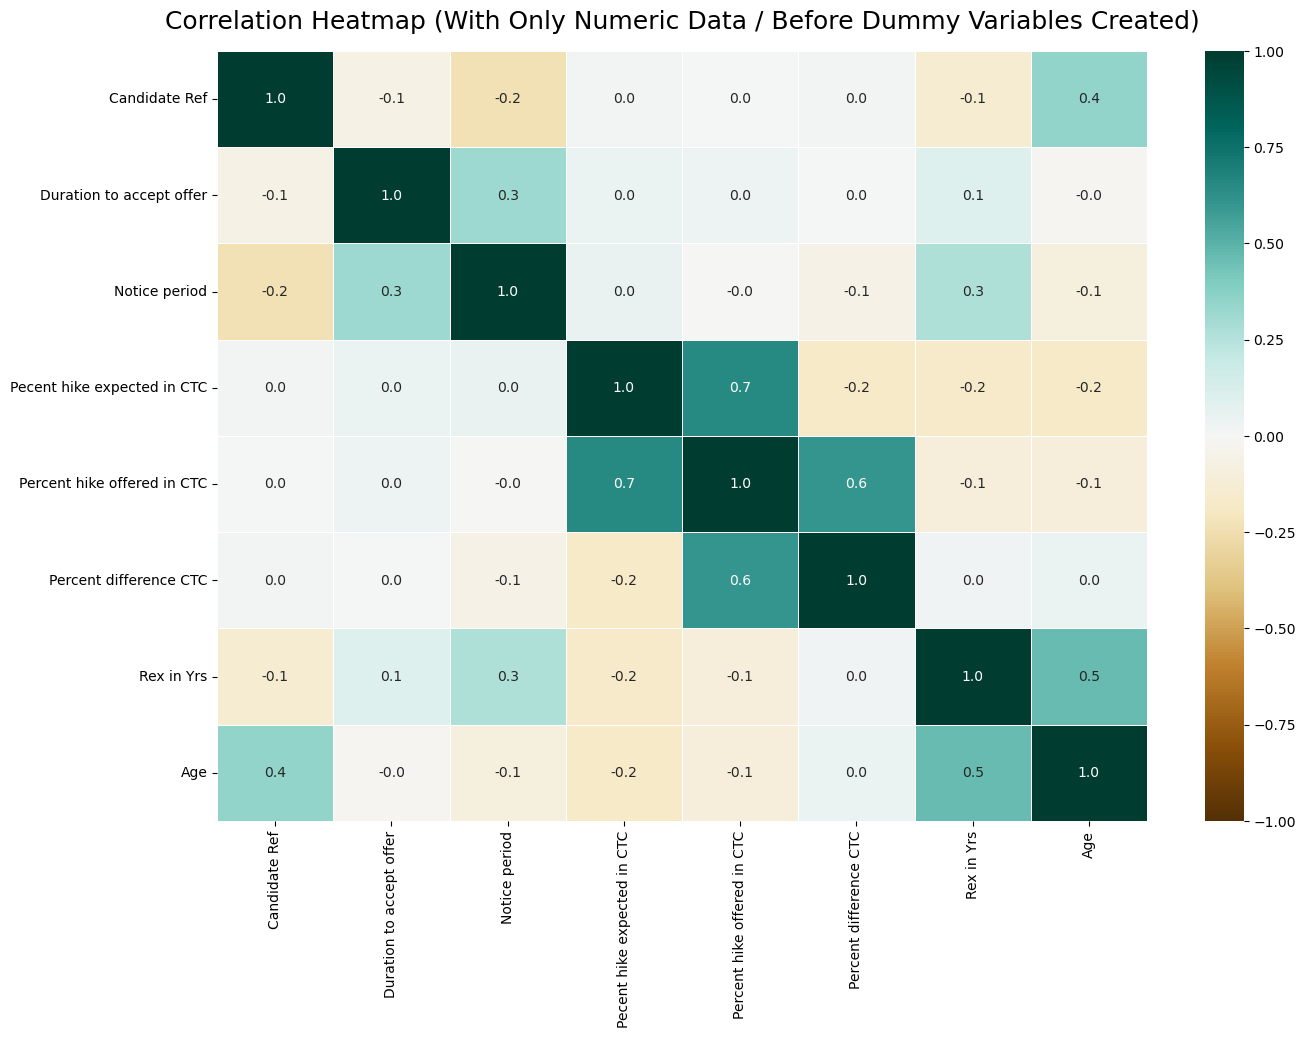

In [78]:
# https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e
plt.figure(figsize=(15, 10))

# define the mask to set the values in the upper triangle to True
# mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(),
                    #   mask=mask,
                      vmin=-1, vmax=1,
                      fmt=".1f", # Round to One Decimal
                      annot=True, # Annotate Values 
                      cmap='BrBG', # Change Color Palette,
                      linewidth=.5
                      )
heatmap.set_title('Correlation Heatmap (With Only Numeric Data / Before Dummy Variables Created)', fontdict={'fontsize':18}, pad=16)

In [79]:
# Dropping to avoid multicollinearity
df.drop(['Percent difference CTC'], axis=1, inplace=True)

# Column Name Incorrectly spelled
df.rename(columns = {'Pecent hike expected in CTC':'Percent hike expected in CTC'}, inplace=True)

In [80]:
# Dropping Unique Identifier
df.drop(['Candidate Ref'], axis=1, inplace=True)

# Dropping Since illegal to include Age & Gender in Hiring
df.drop(['Gender', 'Age'], axis=1, inplace=True)

# Creating Dummy Variables for Nominal/Ordinal Data
dfcat_cols = df.select_dtypes('object').columns.tolist()
df = pd.get_dummies(df, columns=dfcat_cols, drop_first=True)

We see that notice period is most important factor in determining if a candidate will not end up joing a company, followed by if a Candidate is willing to relocate for the position.

Text(0.5, 1.0, 'Features Correlating w/ Candidates Not Joining Company')

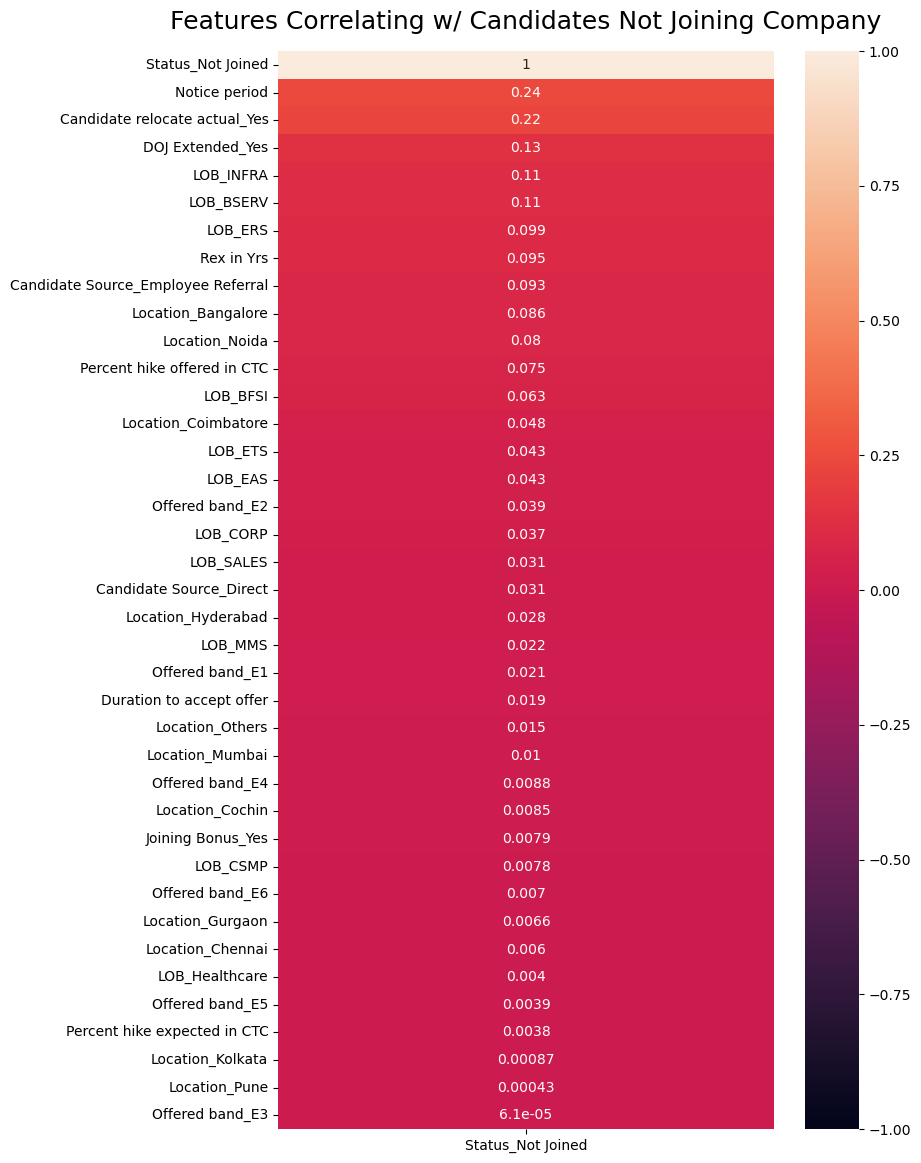

In [89]:
plt.figure(figsize=(8, 14))

# Abs (Absolute Value) used to determine correlation, whether that's + or - 
heatmap = sns.heatmap(abs(df.corr())[['Status_Not Joined']].sort_values(by='Status_Not Joined',
                                                                  ascending=False),
                                                                  vmin=-1, vmax=1,
                                                                  annot=True
                                                                  #cmap='BrBG'
                                                                  )
heatmap.set_title('Features Correlating w/ Candidates Not Joining Company', fontdict={'fontsize':18}, pad=16)

# Building a Model

In [84]:
y = df['Status_Not Joined']
X = df.loc[:, df.columns !='Status_Not Joined']

As this is an imbalanced dataset, SMOTE is applied.

In [85]:
# Based on this, it seems like doing smote isn't a bad idea after all.
df['Status_Not Joined'].value_counts()

0    8375
1    3039
Name: Status_Not Joined, dtype: int64

We have created a model with approximately 85% accuracy.

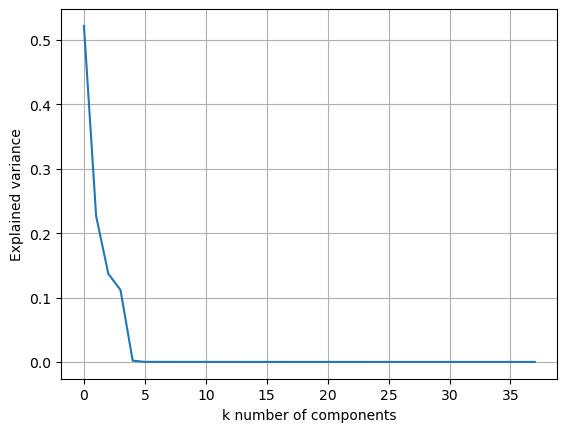


Classification Report after PCA

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1675
           1       0.87      0.82      0.84      1675

    accuracy                           0.85      3350
   macro avg       0.85      0.85      0.85      3350
weighted avg       0.85      0.85      0.85      3350

                                    importance_value
Duration to accept offer                    0.184415
Percent hike offered in CTC                 0.109736
Percent hike expected in CTC                0.108364
Rex in Yrs                                  0.069746
Notice period                               0.066634
Candidate relocate actual_Yes               0.066478
DOJ Extended_Yes                            0.064623
Candidate Source_Employee Referral          0.035827
Location_Noida                              0.034324
LOB_INFRA                                   0.033481
Candidate Source_Direct                     0.028941
Loc

In [92]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection  import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA

## SMOTE balancing
sm = SMOTE(random_state=0)
X_sm, y_sm = sm.fit_resample(X, y)

# 1. PCA
pca_prep = PCA().fit(X_sm)
pca_prep.n_components_
pca_prep.explained_variance_ratio_
plt.plot(pca_prep.explained_variance_ratio_)
plt.xlabel('k number of components')
plt.ylabel('Explained variance')
plt.grid(True)
plt.show()

# Choose 20
n_pc = 20
pca = PCA(n_components= n_pc).fit(X_sm)
Xp = pca.transform(X_sm)
X_train, X_test, y_train, y_test = train_test_split(X_sm,y_sm,test_size =.2,
                                             random_state=1234,stratify=y_sm)
Xp_train, Xp_test, yp_train, yp_test = train_test_split(Xp,y_sm,test_size =.2,
                                        random_state=1234,stratify=y_sm)
rfcm = RandomForestClassifier().fit(X_train, y_train)
rfcm_p = RandomForestClassifier().fit(Xp_train, yp_train)
y_pred = rfcm.predict(X_test)
y_pred_p = rfcm_p.predict(Xp_test)
print('\nClassification Report after PCA\n')
print(metrics.classification_report(yp_test,y_pred_p))

# 2. Feature selection
feature_names = X_sm.columns
%matplotlib inline
importances = rfcm.feature_importances_
# print(plt.barh(feature_names,importances))

# Draw a bar chart to see the sorted importance values with feature names.
df_importances = pd.DataFrame(data=importances, index=feature_names,
                              columns=['importance_value'])
df_importances.sort_values(by = 'importance_value', ascending=False,
                           inplace=True)
print(df_importances)
# print(plt.barh(df_importances.index,df_importances.importance_value))
selector = SelectFromModel(estimator=RandomForestClassifier(),threshold='mean')
X_reduced = selector.fit_transform(X_sm,y_sm)
selector.threshold_
selected_TF = selector.get_support()
print(f'\n** {selected_TF.sum()} features are selected.')

#This shows how many features are selected.
# Show those selected features.
selected_features = []
for i,j in zip(selected_TF, feature_names):
    if i: selected_features.append(j)
print(f'Selected Features: {selected_features}')
X_reduced_train, X_reduced_test, y_reduced_train, y_reduced_test \
       = train_test_split(X_reduced,y_sm,test_size =.2, stratify=y_sm)

# Build a model with the reduced number of features.
rfcm2 = RandomForestClassifier().fit(X_reduced_train, y_reduced_train)
y_reduced_pred = rfcm2.predict(X_reduced_test)
# print('\nClassification Report after feature reduction\n')
# print(metrics.classification_report(y_reduced_test,y_reduced_pred))